# Tutorial 5: Evaluation

### 1. Evaluation measures for an IR system

Assume you have a document collection consisting out of 20000 documents. For your information need, 20 documents are relevant. You compare four IR systems. The first system retrieved 10 documents, out of which 8 are relevant. The second system retrieved 35 documents, out of which 18 are relevant. The third system retrieved 100 documents, out of which 10 are relevant. The fourth system retrieved 1 document, which is relevant.

1. fill out the tables below for the IR systems
2. calculate precision, recall and accuracy for all systems
3. explain, why accuracy is not a good measure for IR tasks.


1\.

|   | Relevant | Nonrelevant |  |
|---|---|---|---|
| Retrieved |    |    |    |
| Not Retrieved |    |    |    |
|    |    |    |    |

2\.

|   | Relevant | Nonrelevant |  |
|---|---|---|---|
| Retrieved |    |    |    |
| Not Retrieved |    |    |    |
|    |    |    |    |

3\.  

|   | Relevant | Nonrelevant |  |
|---|---|---|---|
| Retrieved |    |    |    |
| Not Retrieved |    |    |    |
|    |    |    |    |

4\.  

|   | Relevant | Nonrelevant |  |
|---|---|---|---|
| Retrieved |    |    |    |
| Not Retrieved |    |    |    |
|    |    |    |    |

**Solution**   
1\. 


|   | Relevant | Nonrelevant |  |
|---|---|---|---|
| Retrieved |  tp  |  fp  |  tp + fp  |
| Not Retrieved |  fn  |  tn  |  fn + tn  |
|    |  tp + fn  |  fp + tn  |  tp + fp + fn + tn  |


-----------

|   | Relevant | Nonrelevant |  |
|---|---|---|---|
| Retrieved |  8  |  2  |  10  |
| Not Retrieved |  12  |  19978  |  19990  |
|    |  20  |  19980  |  20000  |

Recall: $R = \frac{tp}{tp+fn} = \frac{8}{20} = 40\%$  
Precision: $P = \frac{tp}{tp+fp} = \frac{8}{10} = 80\%$  
Accuracy: $A = \frac{tp+tn}{tp+tn+fp+fn} = \frac{8 + 19978}{20000} = 99.93\%$

2\. 

|   | Relevant | Nonrelevant |  |
|---|---|---|---|
| Retrieved |  18  |  17  |  35  |
| Not Retrieved |  2  |  19963  |  19965  |
|    |  20  |  19980  |  20000  |

Recall: $R = \frac{tp}{tp+fn} = \frac{18}{20} = 90\%$  
Precision: $P = \frac{tp}{tp+fp} = \frac{18}{35} = 51.43\%$  
Accuracy: $A = \frac{tp+tn}{tp+tn+fp+fn} = \frac{18 + 19963}{20000} = 99.91\%$

3\.  

|   | Relevant | Nonrelevant |  |
|---|---|---|---|
| Retrieved |  10  |  90  |  100  |
| Not Retrieved |  10  |  19890  |  19900  |
|    |  20  |  19980  |  20000  |

Recall: $R = \frac{tp}{tp+fn} = \frac{10}{20} = 50\%$  
Precision: $P = \frac{tp}{tp+fp} = \frac{10}{100} = 10\%$  
Accuracy: $A = \frac{tp+tn}{tp+tn+fp+fn} = \frac{10 + 19890}{20000} = 99.50\%$

4\.  

|   | Relevant | Nonrelevant |  |
|---|---|---|---|
| Retrieved |  1  |  0  |  1  |
| Not Retrieved |  19  |  19980  |  19999  |
|    |  20  |  19980  |  20000  |

Recall: $R = \frac{tp}{tp+fn} = \frac{1}{20} = 5\%$  
Precision: $P = \frac{tp}{tp+fp} = \frac{1}{1} = 100\%$  
Accuracy: $A = \frac{tp+tn}{tp+tn+fp+fn} = \frac{1 + 19980}{20000} = 99.91\%$

Even though precision and recall differ greatly for the four different systems, the accuracy doesn't change much. As the number of non-relevant documents is enormous compared to the number of relevant documents, the IR system would have to retrieve a lot of documents to make an impact on the number of true-negative documents and therefore on the accuracy.

### 2. Further Measures

You have an IR system. For four different information needs, documents were retrieved in the following order (0: document is not relevant for the information need, 1: document is relevant for the information need)
- 1011000110110100010001
- 0001001011101110110110111000101010101
- 0101110110101000100101010101001
- 10100100101011110001010100010010101110111011000100001

Assume that for each information need, you found all relevant documents.

1. plot for each of the four information needs the precision-recall curve
2. plot for each of the four information needs the interpolated precision
3. plot the 11-point interpolated average precision (the 11 points are: 0, 0.1, 0.2, ..., 0.9, 1)
4. Calculate the NDCG for the top 10 search results.
5. calculate the MAP value for the IR system.

**Solution**

In [2]:
r1 = '1011000110110100010001'
r2 = '0001001011101110110110111000101010101'
r3 = '0101110110101000100101010101001'
r4 = '10100100101011110001010100010010101110111011000100001'

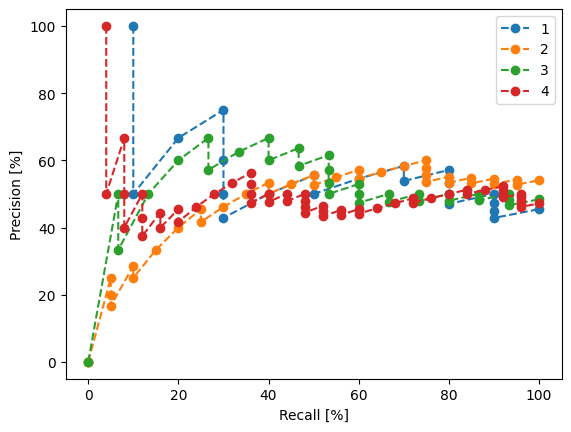

In [3]:
from matplotlib import pyplot as plt
import numpy as np

rel_lists = [r1, r2, r3, r4]
rec_lists = []
prec_lists = []


for n,r in enumerate(rel_lists):
    recall_l = []
    precision_l = []
    tp = 0
    for pos, num in enumerate(r):
        tp += int(num)
        recall_l.append(tp)
        precision_l.append(100.0*tp/(pos+1))
    recall_l =np.divide(recall_l, tp/100.)
    rec_lists.append(recall_l)
    prec_lists.append(precision_l)
    plt.plot(recall_l, precision_l, '--o', label=str(n+1))
    
#print(rec_lists, prec_lists)
    
#plt.axis([0,100,0,100])
plt.xlabel('Recall [%]')
plt.ylabel('Precision [%]')
plt.legend()
plt.show
plt.savefig('PRCurve.pdf')

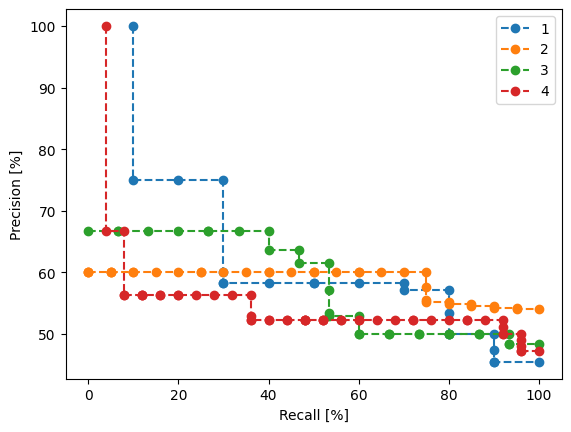

In [4]:
prec_lists_int = []
for num, prec in enumerate(prec_lists):
    prec_l_int = []
    int_prec = 0
    for i in range(1,len(prec)+1):
        if prec[-i]>int_prec:
            int_prec = prec[-i]
        prec_l_int.append(int_prec)
    prec_l_int.reverse()
    prec_lists_int.append(prec_l_int)
    plt.plot(rec_lists[num], prec_l_int, '--o', label=str(num+1))
   
plt.xlabel('Recall [%]')
plt.ylabel('Precision [%]')
plt.legend()
plt.show
plt.savefig('PRCurve-int.pdf')

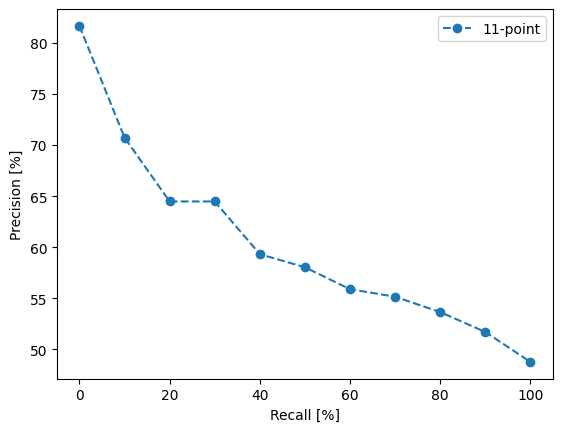

In [5]:
eleven_point = list(range(0,110,10))
prec_eleven=np.zeros(11)
for num, prec_l in enumerate(prec_lists_int):
    rec_l = rec_lists[num]
    pos = 0
    for i in range(11):
        while rec_l[pos]<eleven_point[i]:
            pos += 1
        prec_eleven[i] += prec_l[pos]

prec_eleven = np.divide(prec_eleven, len(prec_lists_int))   
plt.plot(eleven_point, prec_eleven, '--o', label='11-point')
plt.xlabel('Recall [%]')
plt.ylabel('Precision [%]')
plt.legend()
plt.show
plt.savefig('eleven-point.pdf')


In [15]:
import math
NDCG=0
k = 10


for list_num, r in enumerate(rel_lists):
    DCG = 0
    iDCG = 0
    tp = 0
    for pos, rel_score in enumerate(r):
        if pos >= k:
            break
        rel_score = int(rel_score)
        if rel_score==1:
            tp+= rel_score
            DCG+=1./math.log(pos+1+rel_score,2)
    for i in range(1, tp+1):
        iDCG+=1/math.log(i+1,2)
    NDCG+=(DCG/iDCG)
    print(DCG/iDCG)
NDCG /= len(rel_lists)
print("NDCG",NDCG)

0.8638991852433062
0.5286154657071805
0.7326492160647052
0.8421423592553553
NDCG 0.7418265565676367


In [7]:
MAP = 0
for list_num,r in enumerate(rel_lists):
    Map_query=0
    tp = 0
    for pos, num in enumerate(r):
        tp+=int(num)
        Map_query += int(num)*prec_lists[list_num][pos]
    Map_query/=tp
    MAP+= Map_query
    print(Map_query)
MAP/=len(rel_lists)

print("MAP:",MAP)

61.26984126984128
49.51187474175008
55.48909545019602
51.659007601916684
MAP: 54.48245476592602
